<a href="https://colab.research.google.com/github/Liore-S/mobile-price-classification/blob/main/Data_Frame_Basics_and_Data_Cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [ ]:
df=pd.DataFrame({
    "name": ["Anna", "Dane", "David", "Kevin","Joe","Rose"],
    "weight": [45.2, 50.5, 62.1, 64.0, 59.0, np.nan],
    "height": [155, 160, 162, 170, 167, 159],
    "birth_year": [2000, 1997, 1996, 1987, 1998, 2003],
    "gender": ["female", "male", "male", "male", "male", "female"],
    "city": ["New York", "Chicago", "Austin", "New York", np.nan, "New York"]
, })
df

,name,weight,height,birth_year,gender,city
0,Anna,45.2,155,2000,female,New York
1,Dane,50.5,160,1997,male,Chicago
2,David,62.1,162,1996,male,Austin
3,Kevin,64.0,170,1987,male,New York
4,Joe,59.0,167,1998,male,NaN
5,Rose,NaN,159,2003,female,New York


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        6 non-null      object 
 1   weight      5 non-null      float64
 2   height      6 non-null      int64  
 3   birth_year  6 non-null      int64  
 4   gender      6 non-null      object 
 5   city        5 non-null      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 416.0+ bytes


In [ ]:
df.describe()

,weight,height,birth_year
count,5.000000,6.000000,6.000000
mean,56.160000,162.166667,1996.833333
std,8.015173,5.492419,5.419102
min,45.200000,155.000000,1987.000000
25%,50.500000,159.250000,1996.250000
50%,59.000000,161.000000,1997.500000
75%,62.100000,165.750000,1999.500000
max,64.000000,170.000000,2003.000000


In [ ]:
df[["name", "weight", "height", "birth_year", "gender", "city"]]

,name,weight,height,birth_year,gender,city
0,Anna,45.2,155,2000,female,New York
1,Dane,50.5,160,1997,male,Chicago
2,David,62.1,162,1996,male,Austin
3,Kevin,64.0,170,1987,male,New York
4,Joe,59.0,167,1998,male,NaN
5,Rose,NaN,159,2003,female,New York


In [ ]:
urut=df.reindex(columns=["name", "birth_year", "weight", "height", "city", "gender"])
urut

,name,birth_year,weight,height,city,gender
0,Anna,2000,45.2,155,New York,female
1,Dane,1997,50.5,160,Chicago,male
2,David,1996,62.1,162,Austin,male
3,Kevin,1987,64.0,170,New York,male
4,Joe,1998,59.0,167,NaN,male
5,Rose,2003,NaN,159,New York,female


In [ ]:
df[(df["birth_year"]>1996) & (df["gender"]=="male")]

,name,weight,height,birth_year,gender,city
1,Dane,50.5,160,1997,male,Chicago
4,Joe,59.0,167,1998,male,NaN


In [ ]:
df[(df["height"]>157) & (df["gender"]=="female")]

,name,weight,height,birth_year,gender,city
5,Rose,NaN,159,2003,female,New York


In [ ]:
#cek apakah ada data kosong di data frame

In [ ]:
df.isna().sum()

name          0
weight        1
height        0
birth_year    0
gender        0
city          1
dtype: int64

In [ ]:
df["weight"]=df["weight"].fillna(df["weight"].mean())
df

,name,weight,height,birth_year,gender,city
0,Anna,45.20,155,2000,female,New York
1,Dane,50.50,160,1997,male,Chicago
2,David,62.10,162,1996,male,Austin
3,Kevin,64.00,170,1987,male,New York
4,Joe,59.00,167,1998,male,NaN
5,Rose,56.16,159,2003,female,New York


In [ ]:
df["city"]=df["city"].fillna(df["city"].mode()[0])
df

,name,weight,height,birth_year,gender,city
0,Anna,45.20,155,2000,female,New York
1,Dane,50.50,160,1997,male,Chicago
2,David,62.10,162,1996,male,Austin
3,Kevin,64.00,170,1987,male,New York
4,Joe,59.00,167,1998,male,New York
5,Rose,56.16,159,2003,female,New York


In [ ]:
df[(np.abs(stats.zscore(df["weight"])))>=3]

,name,weight,height,birth_year,gender,city


In [ ]:
q1= df["weight"].quantile(0.25)
q3= df["weight"].quantile(0.75)

iqr=q3-q1
fence_low =q1-1.5*iqr
fence_high=q3+1.5*iqr

df.loc[(df["weight"]<fence_low) | (df["weight"]>fence_high)]

,name,weight,height,birth_year,gender,city


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

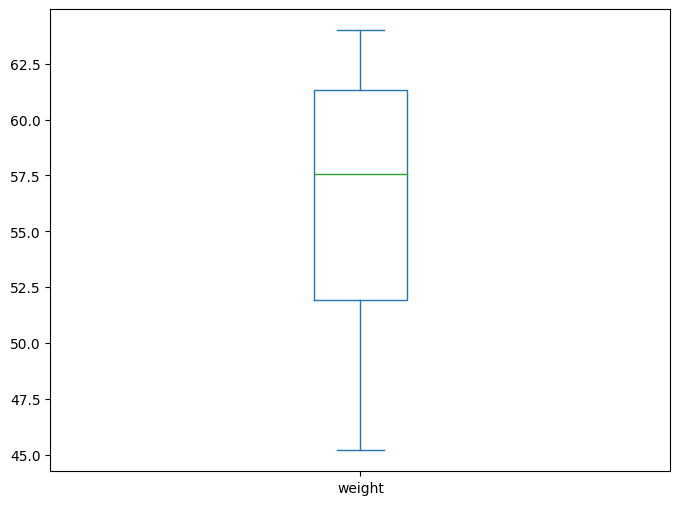

In [ ]:
df["weight"].plot(kind='box', figsize=(8, 6))
plt.show()